# Analyzing Crime Rates in Uzbekistan: A Demographic Perspective

## Introduction

Crime rates in Uzbekistan have been increasing and posing a significant challenge to the safety and well-being of its inhabitants. This alarming trend has prompted concerns from both the general population and governmental authorities. Addressing this problem requires a comprehensive understanding of the factors contributing to the increasing crime rates. This project aims to discover the underlying issues through a data-driven approach, providing valuable insights for informed decision-making.

**The primary objective of this project** is to analyze the dynamics of crime rates in Uzbekistan by integrating crime statistics with demographic data, including population density and income levels. We aim to identify potential correlations and causalities between these variables.

Understanding the main causes of rising crime rates is important for developing effective strategies to address this issue. The findings of this project may provide practical insights for policymakers and governmental authorities of Uzbekistan.

## Methods

### Datasources

**Statistics Agency under the President of the Republic of Uzbekistan** ([www.stat.uz](http://www.stat.uz)) is the main official organization in Uzbekistan that provides statistical information on socio-economic and demographic events and processes. For this project, the following three datasets were used:

##### Datasource1: **CrimeRate** = *recorded crimes across all services lines by region*
* Metadata URL: https://stat.uz/images/Docs/415-sotssfera_crime-en.pdf
* Data URL: https://api.stat.uz/api/v1.0/data/hududlar-kesimida-jami-royxatga-olingan-jinoyatla?lang=en&format=xlsx
* Data Type: XLSX

##### Datasource2: **PopulationDensity** - *population density at the beginning of the year, the number of inhabitants per 1 sq. km*
* Metadata URL: https://stat.uz/images/uploads/docs/21___Population_en.pdf
* Data URL: https://api.stat.uz/api/v1.0/data/aholining-zichligi?lang=en&format=xlsx
* Data Type: XLSX

##### Datasource3: **IncomeLevels** - *total per capita income by region, in thousand soums. For 2000-2009 given cash incomes, from 2010 total comprehensive income, since 2010 revised data.*
* Metadata URL: https://stat.uz/images/uploads/docs/315___Total_per_capita_income_by_region_en.pdf
* Data URL: https://api.stat.uz/api/v1.0/data/hududlar-boyicha-aholi-jon-boshiga-umumiy-darom?lang=en&format=xlsx
* Data Type: XLSX


**Installing Dependencies**

In [88]:
%pip install matplotlib
%pip install numpy
%pip install pandas
%pip install requests
%pip install openpyxl
%pip install statsmodels
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


**Importing Modules**

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import subprocess
import platform
import statsmodels.api as sm

### Data Pipeline

Data downloading, conversion and extraction parts of the datapipeline are done using *pipeline.py* script.
*The first problem* that had to be solved was about SSL verification issue, assumingly caused by the server-side problem. Downloading the Excel files was possible only after disabling the SSL verification, which resulted in *InsecureRequestWarning*.

In the next step, we had to get rid of the unneseccary columns and rows (every Excel file has information in three languages: Uzbek, Russian and English, but we just need the latter one) and standardize the column names.

At the end of its execution, the *pipeline.py* converts all Excel files into CSV files and saves them into the *data/* directory.

In [90]:
subprocess.run(["python", "pipeline.py"])

CompletedProcess(args=['python', 'pipeline.py'], returncode=1)

**Loading Data**

In [91]:
# Loading Population Density data
population_density_data = pd.read_csv('../data/population_density_data.csv', index_col='Regions')

# Loading Crime Rate data
crime_data = pd.read_csv('../data/crime_data.csv', index_col='Regions')

# Loading Income Level data
income_data = pd.read_csv('../data/income_data.csv', index_col='Regions')

**Preparing Data**

In [92]:
# Excluding 'Republic of Uzbekistan' row
population_density_data = population_density_data[population_density_data.index != 'Republic of Uzbekistan']
crime_data = crime_data[crime_data.index != 'Republic of Uzbekistan']
crime_data = crime_data[crime_data.index != 'Unlocated data']
income_data = income_data[income_data.index != 'Republic of Uzbekistan']

# Filtering years
start_year, end_year = 2008, 2022
common_years = [str(year) for year in range(start_year, end_year + 1)]

population_density_data = population_density_data[common_years]
crime_data = crime_data[common_years]
income_data = income_data[common_years]

### Data Analysis
First, let's have a look at the overall data that shows the trends by regions. There are 14 territorial subjects in Uzbekistan.

**Visualizing Data**

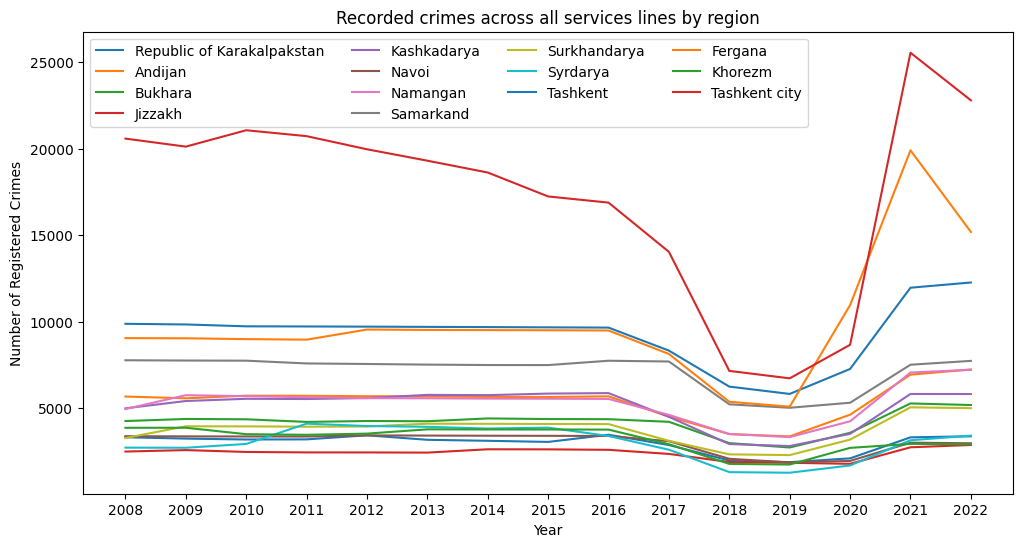

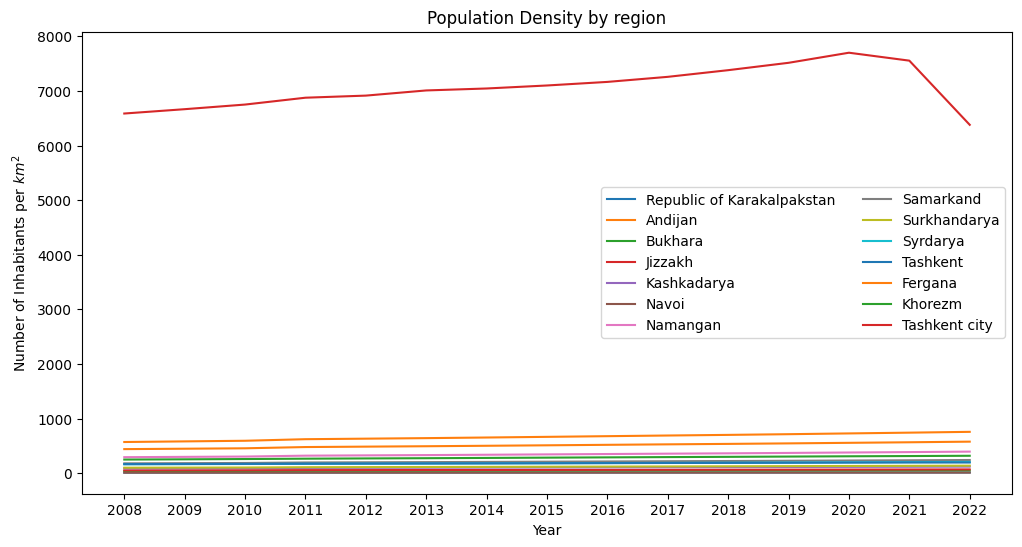

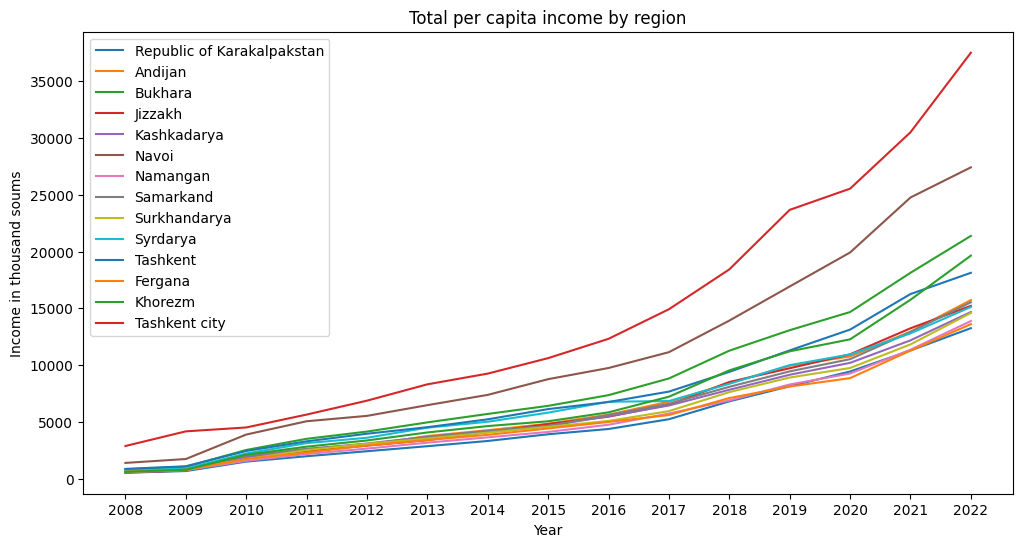

In [93]:
# Plotting Crime Data
plt.figure(figsize=(12, 6))
for region in crime_data.index:
    plt.plot(crime_data.columns, crime_data.loc[region], label=region)

plt.title('Recorded crimes across all services lines by region')
plt.xlabel('Year')
plt.ylabel('Number of Registered Crimes')
plt.legend(loc='upper left', ncol=4)
plt.show()

# Plotting Population Density Data
plt.figure(figsize=(12, 6))
for region in population_density_data.index:
    plt.plot(population_density_data.columns, population_density_data.loc[region], label=region)

plt.title('Population Density by region')
plt.xlabel('Year')
plt.ylabel('Number of Inhabitants per $km^2$')
plt.legend(loc='center right', ncol=2)
plt.show()

# Plotting Income Data
plt.figure(figsize=(12, 6))
for region in income_data.index:
    plt.plot(income_data.columns, income_data.loc[region], label=region)

plt.title('Total per capita income by region')
plt.xlabel('Year')
plt.ylabel('Income in thousand soums')
plt.legend(loc='upper left')
plt.show()

Now, in order to analyze the dynamics of crime rates in Uzbekistan by integrating crime rate statistics with population density and income levels of population, we focus on the last 5 years' data of the whole Uzbekistan.

**Merging Datasets**

In [94]:
# Loading population density data
population_density_data = pd.read_csv('../data/population_density_data.csv')

# Loading crime data
crime_data = pd.read_csv('../data/crime_data.csv')

# Loading income data
income_data = pd.read_csv('../data/income_data.csv')

# selected_years = ['2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']
selected_years = ['2018', '2019', '2020', '2021', '2022']

TotalCrimes = crime_data[crime_data['Regions'] == 'Republic of Uzbekistan'][selected_years].melt(var_name='Year', value_name='Total Number of Crimes')
TotalDemographics = population_density_data[population_density_data['Regions'] == 'Republic of Uzbekistan'][selected_years].melt(var_name='Year', value_name='Total Density of Population')
TotalIncome = income_data[income_data['Regions'] == 'Republic of Uzbekistan'][selected_years].melt(var_name='Year', value_name='Total Income per Capita')

# Merging the datasets based on a common identifier
merged_data = pd.merge(TotalCrimes, TotalDemographics, on='Year')
merged_data = pd.merge(merged_data, TotalIncome, on='Year')

To have a visual-intuitive understanding of the trends, we visualize the data in one plot.

**Visualizing Trends**

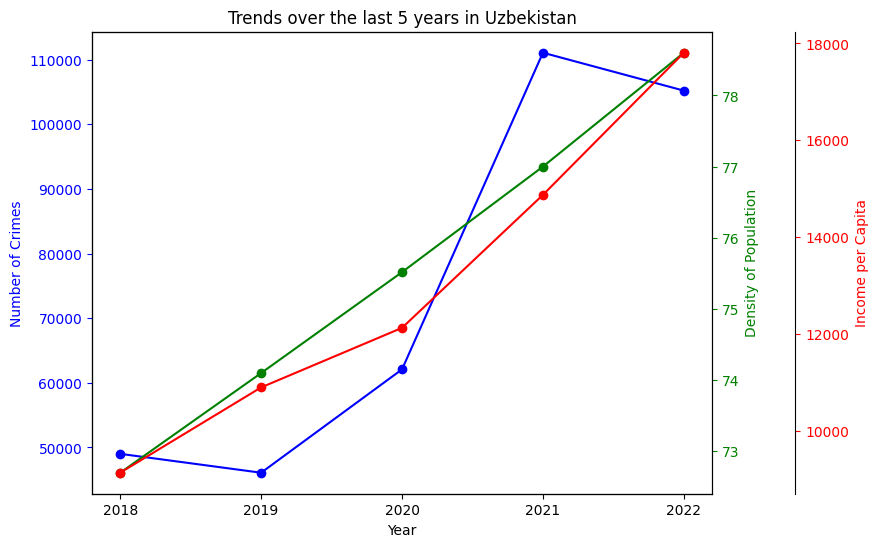

In [95]:
fig, ax1 = plt.subplots(figsize=(8, 6))

# Plotting Total Number of Crimes
ax1.plot(merged_data['Year'], merged_data['Total Number of Crimes'], marker='o', label='Total Number of Crimes', color='blue')
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Crimes', color='blue')
ax1.tick_params('y', colors='blue')

# Total Density of Population
ax2 = ax1.twinx()
ax2.plot(merged_data['Year'], merged_data['Total Density of Population'], marker='o', label='Total Density of Population', color='green')
ax2.set_ylabel('Density of Population', color='green')
ax2.tick_params('y', colors='green')

# Total Income per Capita
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))
ax3.plot(merged_data['Year'], merged_data['Total Income per Capita'], marker='o', label='Total Income per Capita', color='red')
ax3.set_ylabel('Income per Capita', color='red')
ax3.tick_params('y', colors='red')

plt.title('Trends over the last ' + str(len(selected_years)) + ' years in Uzbekistan')
plt.show()

While the correlation of the variables is obvious from the graph above, it's time to get the actual numerical results of correlation and causality analysis.

## Results

**Correlation Coefficients**

In [96]:
correlation_crimes_density = merged_data['Total Number of Crimes'].corr(merged_data['Total Density of Population'])
correlation_crimes_income = merged_data['Total Number of Crimes'].corr(merged_data['Total Income per Capita'])
correlation_density_income = merged_data['Total Density of Population'].corr(merged_data['Total Income per Capita'])

print(f"Correlation between crimes and population density: {correlation_crimes_density}")
print(f"Correlation between crimes and income per capita: {correlation_crimes_income}")
print(f"Correlation between population density and income per capita: {correlation_density_income}")

Correlation between crimes and population density: 0.8993466725758003
Correlation between crimes and income per capita: 0.9033464532864491
Correlation between population density and income per capita: 0.9900786000797461


**Ordinary Least Squares (OLS) regression analysis**

*dependent variable:* 'Total Number of Crimes'

*independent variables:* 'Total Density of Population', 'Total Income per Capita'

In [97]:
X = merged_data[['Total Density of Population', 'Total Income per Capita']]
X = sm.add_constant(X)
y = merged_data['Total Number of Crimes']

model = sm.OLS(y, X).fit()
print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     Total Number of Crimes   R-squared:                       0.817
Model:                                OLS   Adj. R-squared:                  0.635
Method:                     Least Squares   F-statistic:                     4.473
Date:                    Wed, 10 Jan 2024   Prob (F-statistic):              0.183
Time:                            04:00:30   Log-Likelihood:                -54.027
No. Observations:                       5   AIC:                             114.1
Df Residuals:                           2   BIC:                             112.9
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

c:\Users\XXXX\miniconda3\envs\MADE\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


**Correlation Matrix**

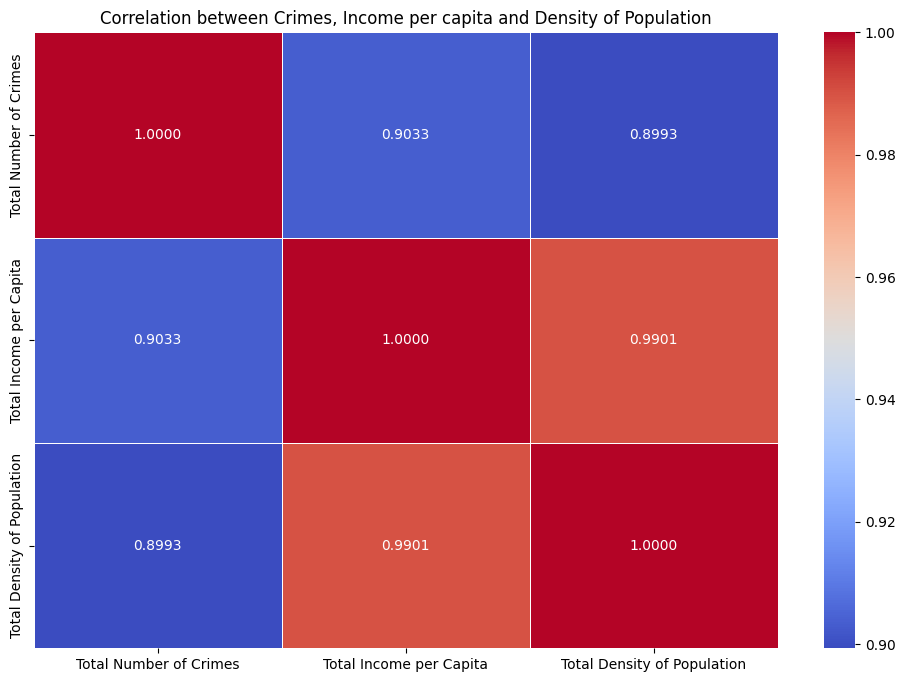

In [98]:
correlation_matrix_overall = merged_data[['Total Number of Crimes', 'Total Income per Capita', 'Total Density of Population']].corr()

# plotting matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_overall, annot=True, cmap='coolwarm', fmt=".4f", linewidths=.5)
plt.title('Correlation between Crimes, Income per capita and Density of Population')
plt.show()

**Regression Plots**

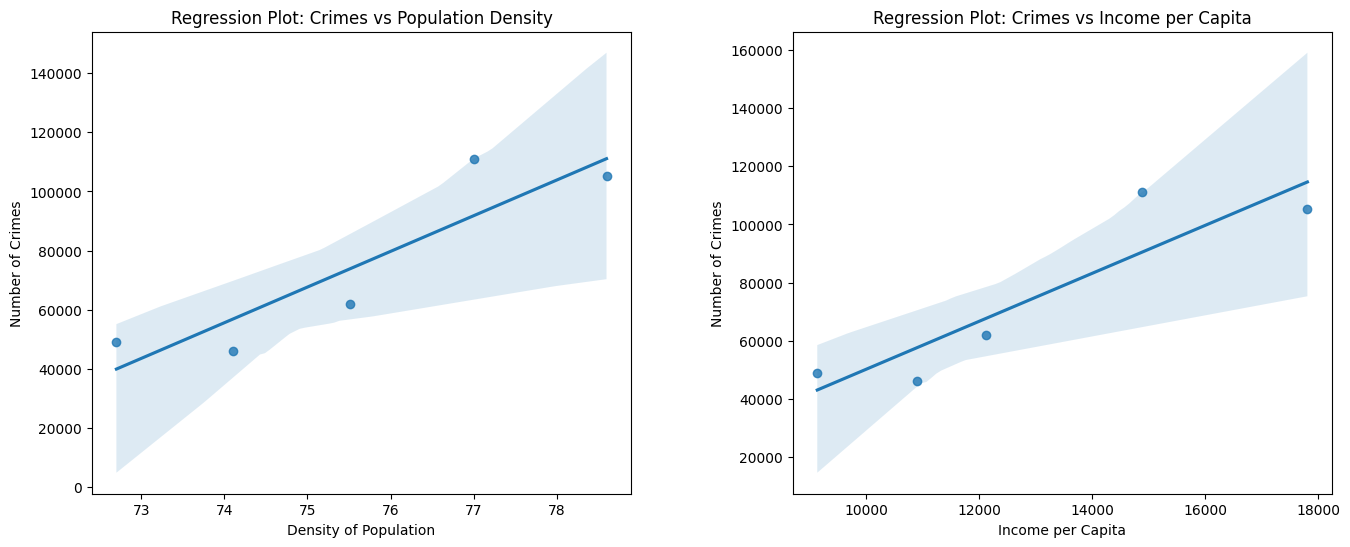

In [99]:
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
sns.regplot(x='Total Density of Population', y='Total Number of Crimes', data=merged_data)
plt.title('Regression Plot: Crimes vs Population Density')
plt.xlabel('Density of Population')
plt.ylabel('Number of Crimes')

plt.subplots_adjust(wspace=0.3)

plt.subplot(1, 2, 2)
sns.regplot(x='Total Income per Capita', y='Total Number of Crimes', data=merged_data)
plt.title('Regression Plot: Crimes vs Income per Capita')
plt.xlabel('Income per Capita')
plt.ylabel('Number of Crimes')
plt.show()

## Discussion and Conclusions

The analysis of the data has provided valuable insights into the dynamics of crime rates in Uzbekistan. **The key findings are the following:**

1. *Correlation between Crimes and Population Density:*
The correlation coefficient between the total number of crimes and population density is found to be 0.8993. This indicates a strong positive correlation, suggesting that as population density increases, the number of crimes increase too. This finding aligns with the intuitive reasoning that the higher population density associated with increased opportunities for criminal activities.

2. *Correlation between Crimes and Income per Capita:*
The correlation coefficient between the total number of crimes and income per capita is found to be 0.9033. On the contrary to the previous finding, this positive correlation is counter-intuitive because higher income levels usually suggests more safety and well-being. This result might be attributed to different factors, such as increased availability of valuable assets in wealthier areas, making them attractive targets for criminals.

3. *Correlation between Population Density and Income per Capita:*
The correlation coefficient between population density and income per capita, that we were not even considering to calculate from the beginning of the project, turns out to be exceptionally high at 0.9901. This indicates that areas with higher population density tend to have higher income per capita. This correlation might be explained by the concentration of economic activities and resources in urban areas, mainly contributed by the capital of Uzbekistan - megapolis Tashkent city.

*Regression Analysis Results:*

*The Ordinary Least Squares (OLS) regression* results provide additional insights into the relationships between the variables. The model's R-squared value of 0.817 indicates that approximately 81.7% of the variability in the total number of crimes can be explained by the combination of population density and income per capita. However, it's important to note the non-significant p-values that indicate that the coefficients for population density (3372.1669) and income per capita (5.9687) could be due to random chance rather than representing true relationships. These results suggest that, while there is a high correlation between the variables, the individual coefficients in the regression model are not robust enough to make definitive conclusions.

#### Limitations

The limitations that the models faced occurred due to the small sample size. We only used the data of the last 5 years, due to some nuances. For example, the reduction in crime rates from 2016 to 2019 introduces an element of skepticism regarding the reliability of these data points. Moreover, political changes in Uzbekistan around 2017, coupled with significant policy shifts, including the liberalization of national currency (soum) regulations made us to choose the datapoints from more stable years.

#### Outlook to Future Work

The findings of this study underscore the complexity of the factors influencing crime rates in Uzbekistan. While the correlations provide initial insights, further research with a larger, reliable and more diverse dataset, along with advanced statistical techniques, is required to better understand the nuanced relationships between population density, income per capita, and crime rates.